In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv(url, sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# print a list unique values per features

data1 = data.groupby('fixed acidity')
data1

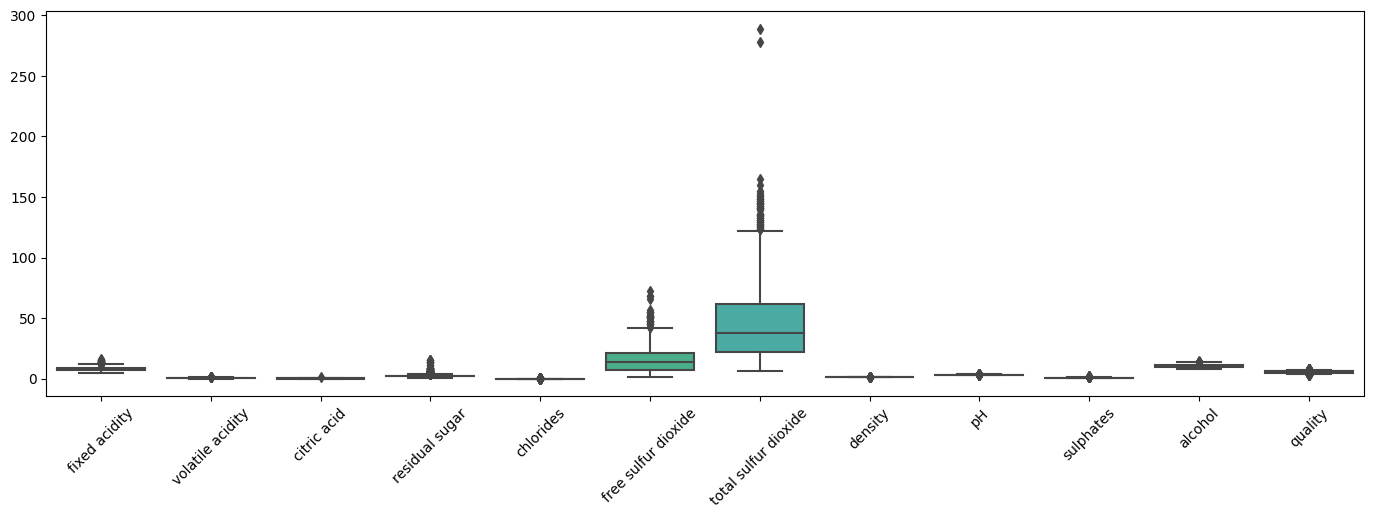

In [7]:
fig, ax = plt.subplots(1, figsize = (17,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

In [8]:
data = data[data['total sulfur dioxide'] < 200]

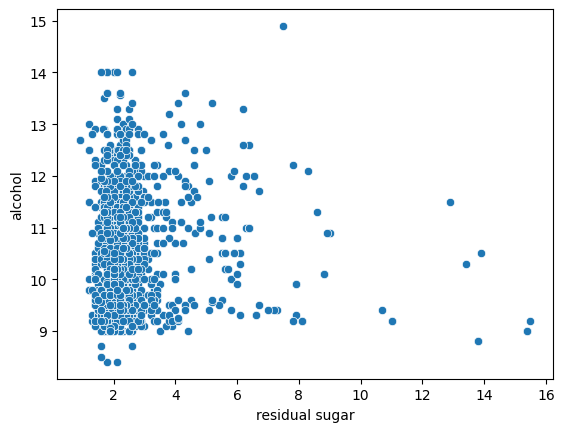

In [9]:
# visual data exploration
sns.scatterplot(x = data['residual sugar'], y = data['alcohol'])
plt.show()

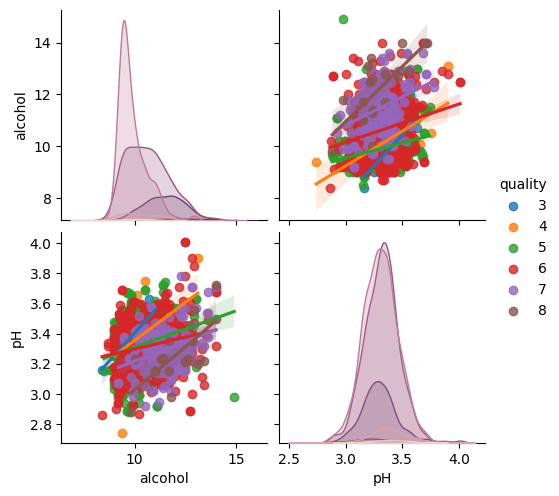

In [10]:
sns.pairplot(data[['alcohol', 'pH', 'quality']], kind = 'reg', hue = 'quality')
plt.show()

In [11]:
# T-test
import scipy.stats as stats

In [12]:
x= data['volatile acidity'][data['quality']==3]
y= data['volatile acidity'][data['quality']==8]

In [13]:
# t-test is the mean of average different data points this and the mean of average different data point that
ttest = stats.ttest_ind(x,y)

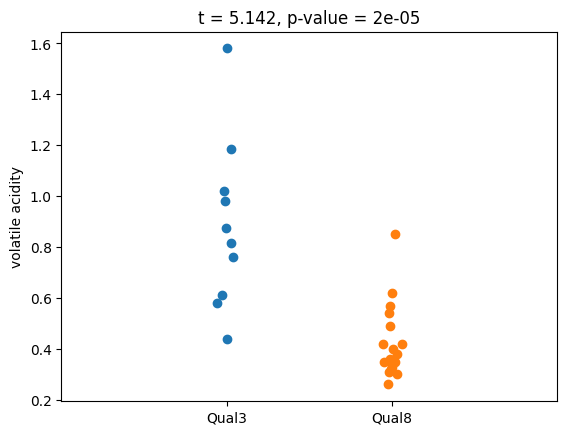

In [14]:
plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30 + 1, y, 'o')
plt.xlim([-1,2])
plt.xticks([0,1], labels=['Qual3', 'Qual8'])
plt.ylabel('volatile acidity')
plt.title(f't = {round(ttest[0],3)}, p-value = {round(ttest[1],5)}')
plt.show()

Text(0, 0.5, 'Number')

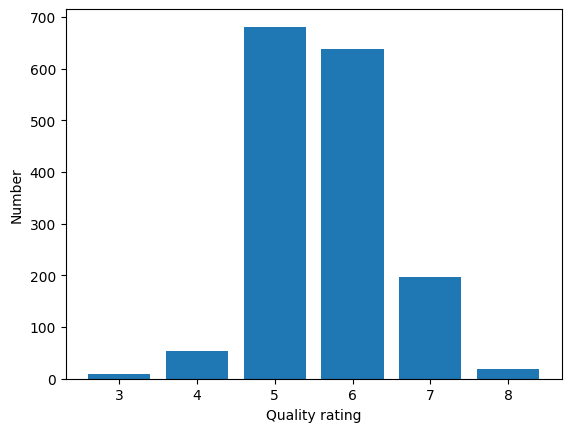

In [15]:
from collections import Counter
qualcounts = Counter(data['quality'])
plt.bar(qualcounts.keys(), qualcounts.values())
plt.xlabel('Quality rating')
plt.ylabel('Number')

In [16]:
type(list(qualcounts.keys()))

list

In [17]:
x= data['volatile acidity'][data['quality']<5 ]
y= data['volatile acidity'][data['quality']>6 ]

In [18]:
# t-test is the mean of average different data points this and the mean of average different data point that
ttest = stats.ttest_ind(x,y)
ttest

Ttest_indResult(statistic=12.765504354353604, pvalue=1.215425804161403e-29)

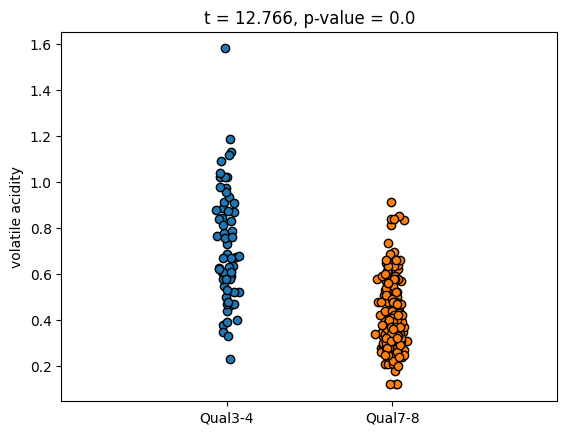

In [19]:
plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30 + 1, y, 'o', markeredgecolor = 'k')
plt.xlim([-1,2])
plt.xticks([0,1], labels=['Qual3-4', 'Qual7-8'])
plt.ylabel('volatile acidity')
plt.title(f't = {round(ttest[0],3)}, p-value = {round(ttest[1],8)}')
plt.show()

In [20]:
# multiple regression
import statsmodels.api as sm

In [21]:
dep_var = data['quality'] # depend variable
ind_var = data.drop(labels = 'quality', axis = 1) # independent variable
ind_var

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
ind_var= sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.30e-145
Time:                        20:24:50   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

In [23]:
sig_cols = list(model.pvalues[model.pvalues<.05].keys())
[print(i) for i in sig_cols]; # the output of print function is none

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


In [24]:
sig_cols.append('quality')

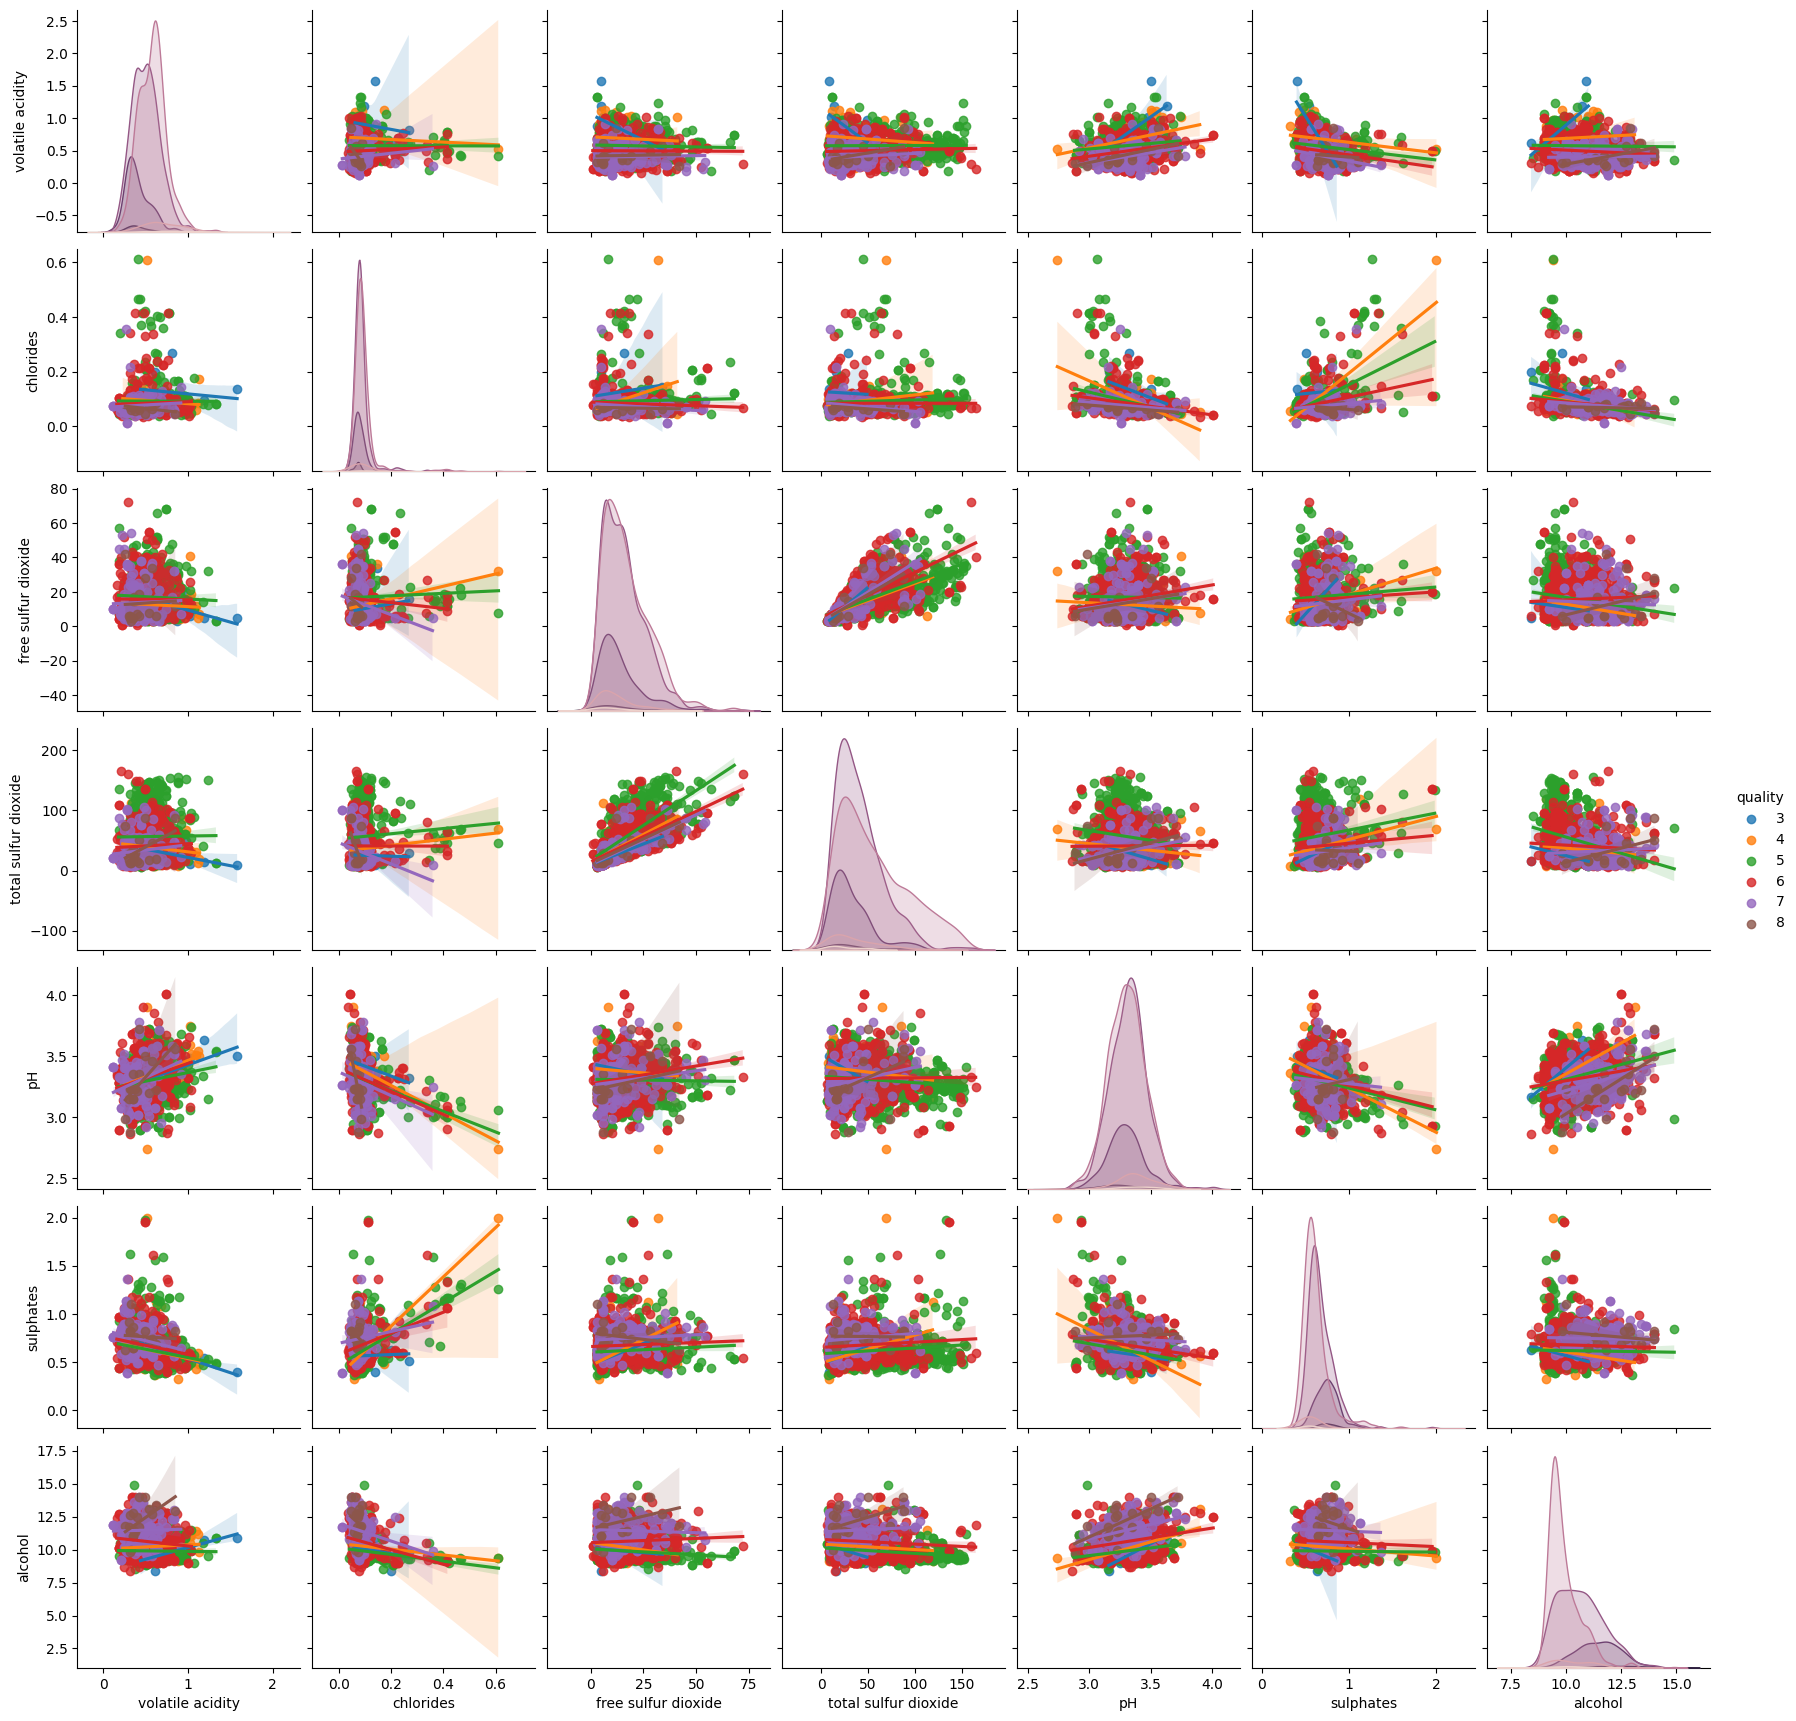

In [25]:
sns.pairplot(data = data[sig_cols],kind = 'reg',  hue = 'quality')
plt.show()


In [27]:
qual_mean = data['quality'].mean()
data['binquality'] = data['quality']>qual_mean
data

<ipython-input-27-05e7dfc3453d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binquality'] = data['quality']>qual_mean


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [36]:
# run a logistic regression
data.drop(['quality', 'binquality'], axis = 1)
# another way
data1 = data.iloc[:,:-2]
data1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [38]:
model = sm.Logit(data['binquality'], data1)
results = model.fit(method='newton')
results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                  0.2525
Time:                        20:57:14   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

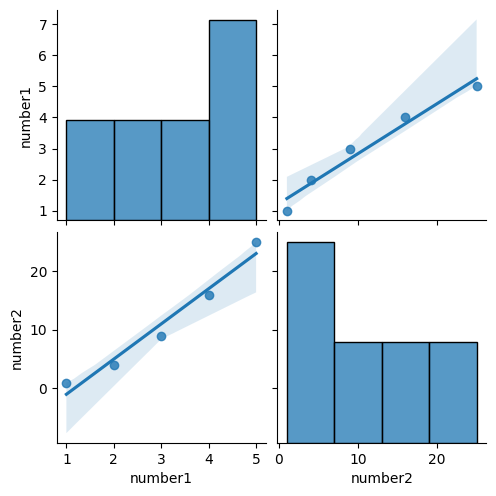

In [39]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]
df = pd.DataFrame({'number1': x,
                   'number2': y})
sns.pairplot(df, kind ='reg')

In [42]:
stats.ttest_ind(x,y)

Ttest_indResult(statistic=-1.8257418583505536, pvalue=0.10532192111733753)

In [46]:
sig_cols = list(results.pvalues[results.pvalues < 0.05].keys())
sig_cols

['volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']